In [1]:
import numpy as np
import pandas as pd
import networkx as nx

# LUCAS0 "unbiased" test set generation

In [2]:
attributes = [
    "anxiety",
    "peer pressure",
    "yellow fingers",
    "smoking",
    "genetics",
    "allergy",
    "lung cancer",
    "attention disorder",
    "coughing",
    "fatigue",
    "car accident"
]   

In [3]:
causalgraph = nx.DiGraph()
causalgraph.add_weighted_edges_from([
    (1, 4, 0.4),
    (2, 4, 0.6),
    (4, 3, 1),
    (4, 7, 0.6),
    (5, 7, 0.4),
    (5, 8, 1),
    (6, 9, 0.7),
    (7, 9, 0.3),
    (7, 10, 0.6),
    (8, 11, 0.2),
    (9, 10, 0.4),
    (10, 11, 0.8)
])

In [4]:
def func(data, preds):
    val = 0
    for edge in preds:
        val += data[edge[0]-1] * edge[2]["weight"]
    return val + np.random.normal()*0.05

def generate_data(N, causalgraph):
    topsort = list(nx.topological_sort(causalgraph))
    data = np.zeros((N, 11))
    for i in range(N):
        for j in topsort:
            preds = list(causalgraph.in_edges(j, data=True))
            if len(preds) == 0:
                data[i][j-1] = np.random.normal()
            else:
                data[i][j-1] = func(data[i], preds)
    return data

In [5]:
data = generate_data(10000, causalgraph)
df = pd.DataFrame(columns=attributes, data=data)
df

anxiety  peer pressure  yellow fingers   smoking  genetics   allergy  \
0    -0.723758       0.458960       -0.015949 -0.058299 -0.577990  0.956369   
1     1.821226       1.526192        1.677391  1.724010  1.653561 -0.344339   
2     0.252450      -0.890142       -0.540936 -0.447693 -0.162496  1.158762   
3    -0.437987      -0.668859       -0.547554 -0.634440  0.401857 -0.053999   
4    -0.363588      -1.595054       -1.194678 -1.152482  1.089024  0.332314   
...        ...            ...             ...       ...       ...       ...   
9995  0.663099      -0.153132        0.302138  0.243342  0.464678 -0.861204   
9996  2.810252      -1.818302       -0.056494 -0.001390  0.357215  0.439824   
9997  0.742652      -1.407046       -0.546333 -0.588205 -0.028805 -1.143991   
9998  0.583051      -0.398459       -0.049118 -0.026866  0.943719 -0.112255   
9999 -0.128905      -0.290484       -0.247094 -0.188849 -1.509746 -1.924779   

      lung cancer  attention disorder  coughing   fatigue  car accident  
0       -0.162313           -0.618070  0.702017  0.193234     -0.008324  
1        1.759068            1.743131  0.224069  1.169089      1.351971  
2       -0.373887           -0.197717  0.652710  0.066449      0.033574  
3       -0.281229            0.385730 -0.062952 -0.210601     -0.077485  
4       -0.230736            1.072597  0.183394 -0.076306      0.162191  
...           ...                 ...       ...       ...           ...  
9995     0.415685            0.452462 -0.504609 -0.015640      0.035576  
9996     0.066337            0.260003  0.375949  0.209921      0.323432  
9997    -0.315412            0.006283 -0.887792 -0.573595     -0.423087  
9998     0.332862            0.977950  0.022553  0.156466      0.362434  
9999    -0.692453           -1.552477 -1.407320 -1.017501     -1.074367  

[10000 rows x 11 columns]

In [6]:
data.shape

(10000, 11)

[[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]]
[[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 -1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]]
[[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0 

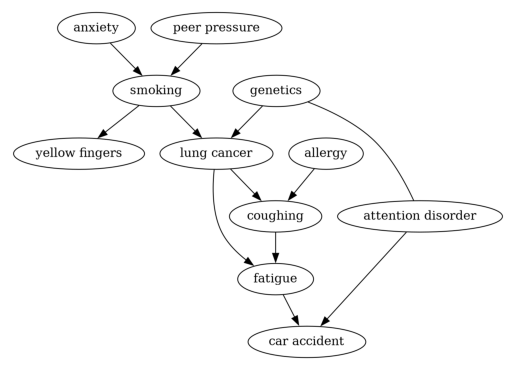

In [7]:
from causallearn.search.ScoreBased.GES import ges
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

res = ges(data)
pyd = GraphUtils.to_pydot(res['G'], labels=attributes)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

# Test set visualization

## General pairplot

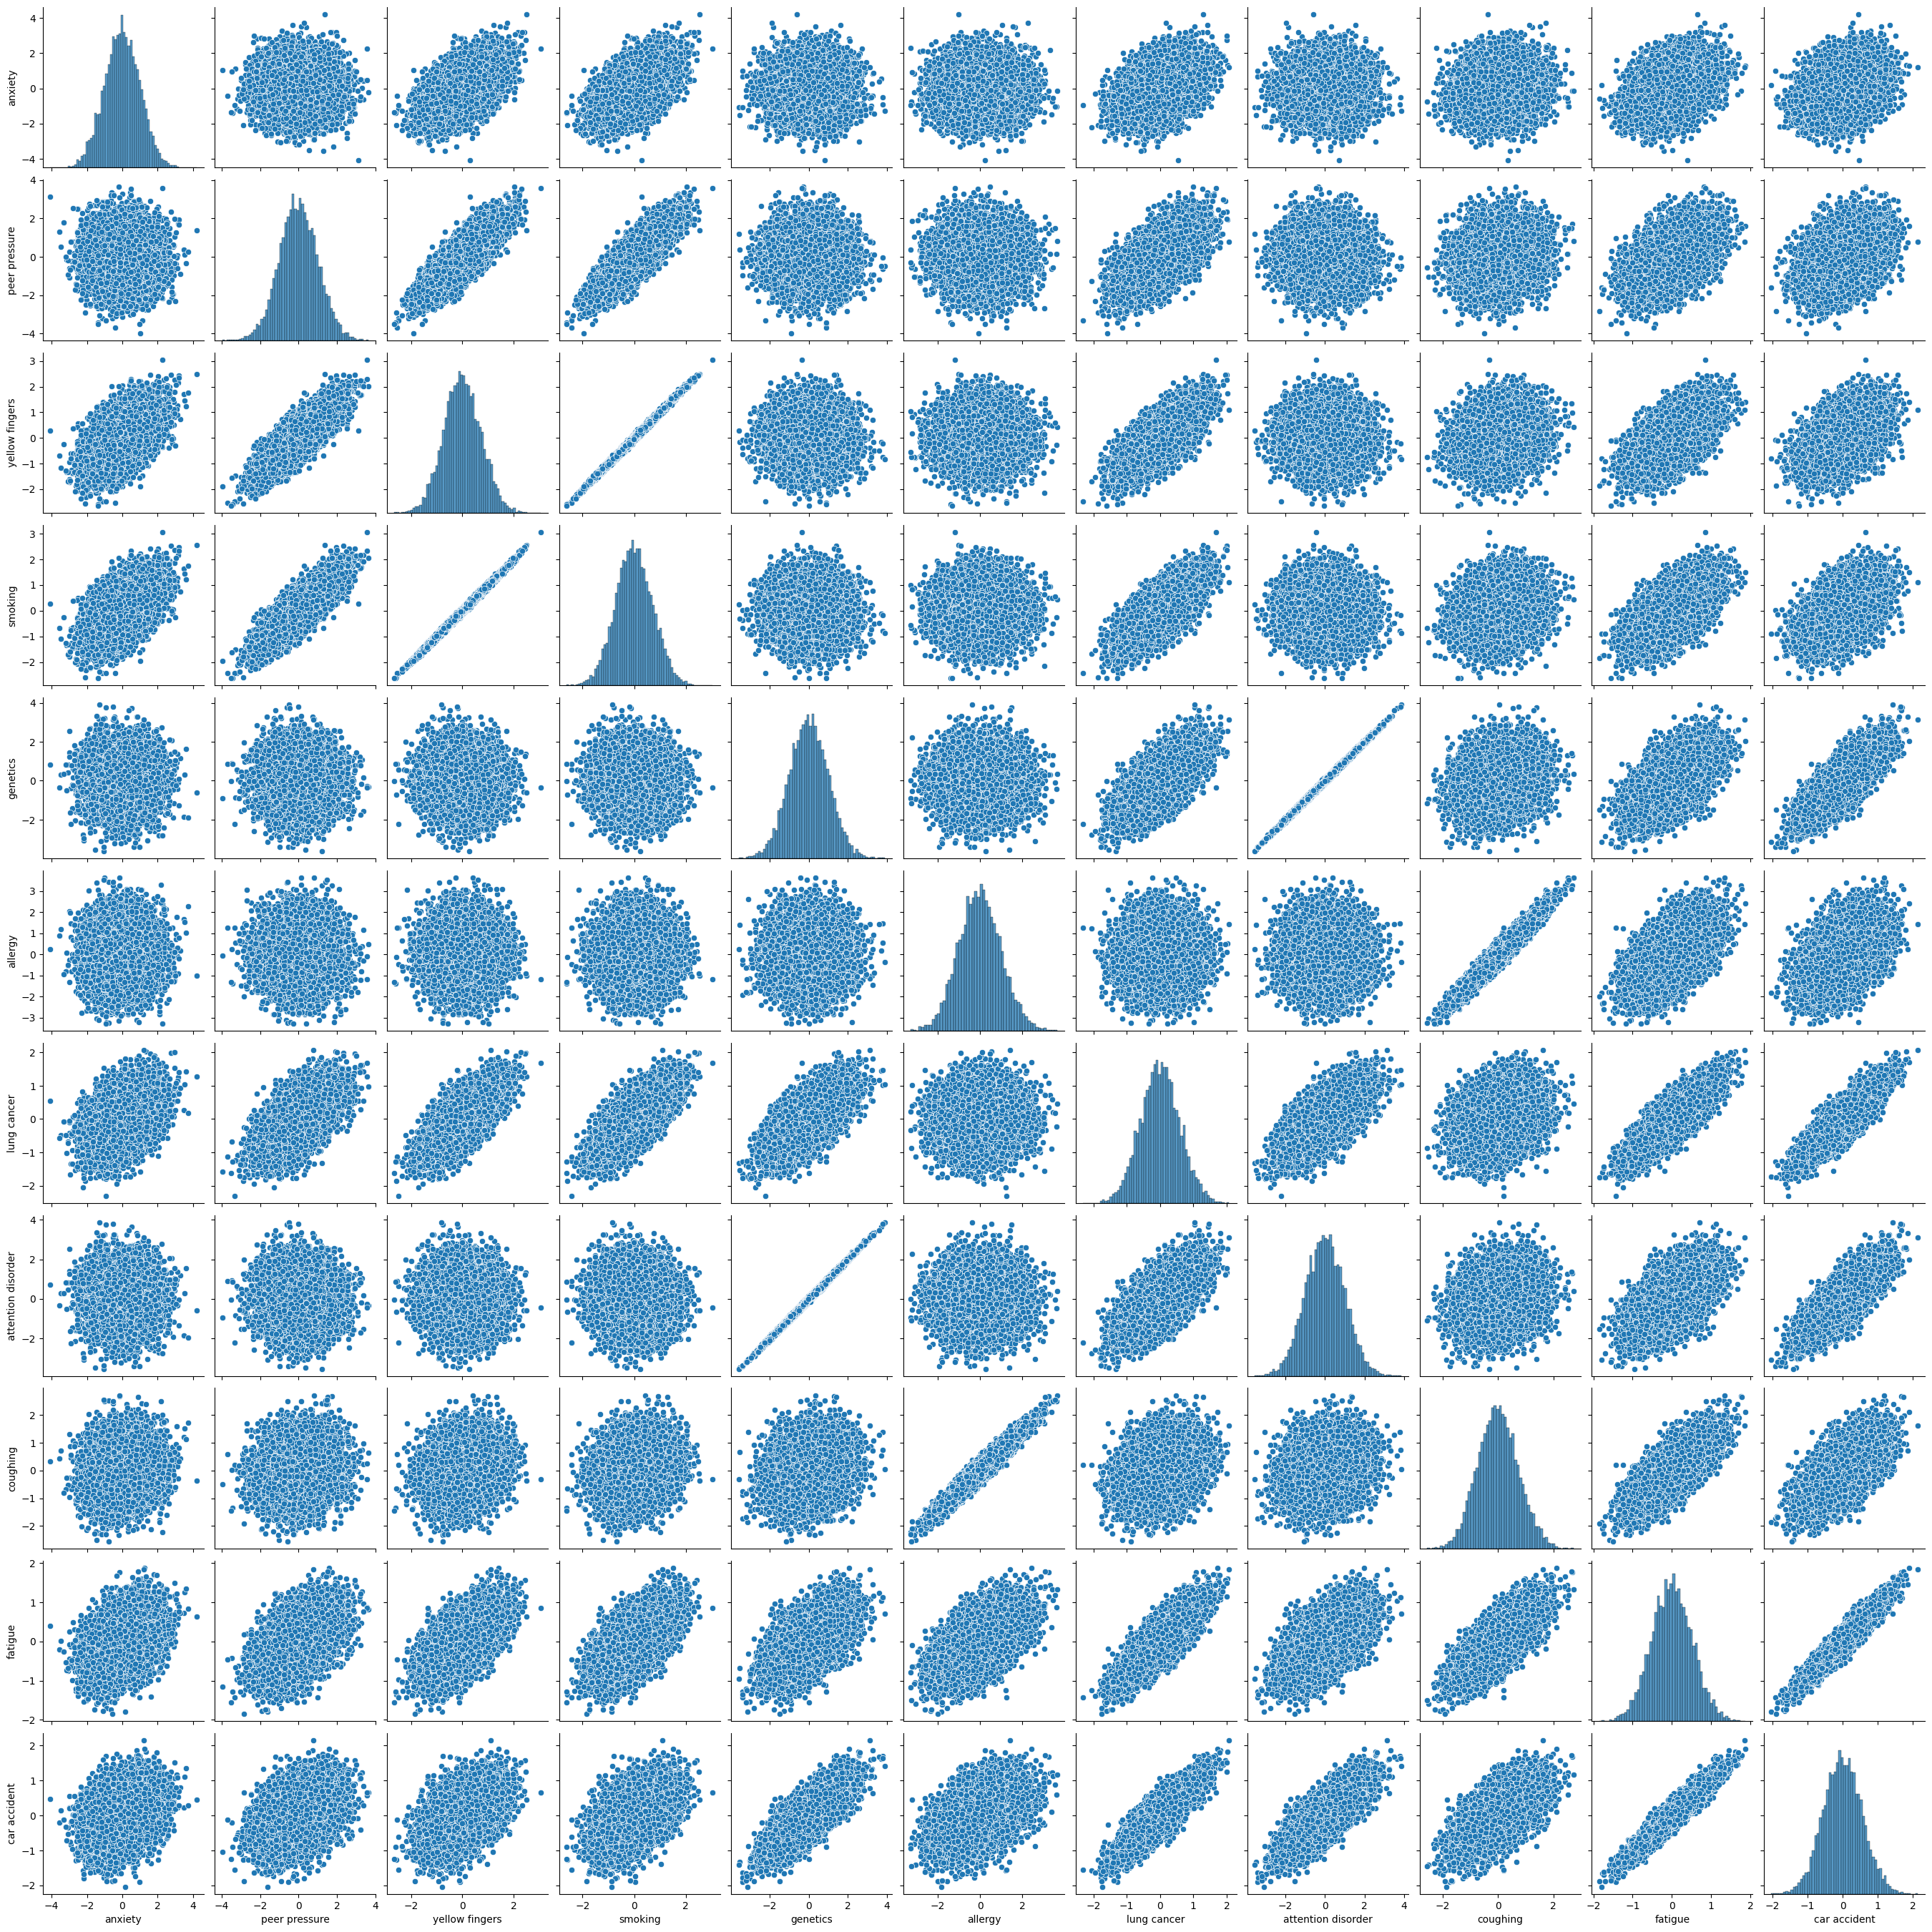

In [11]:
import seaborn
seaborn.pairplot(df)

## Focused pairplot

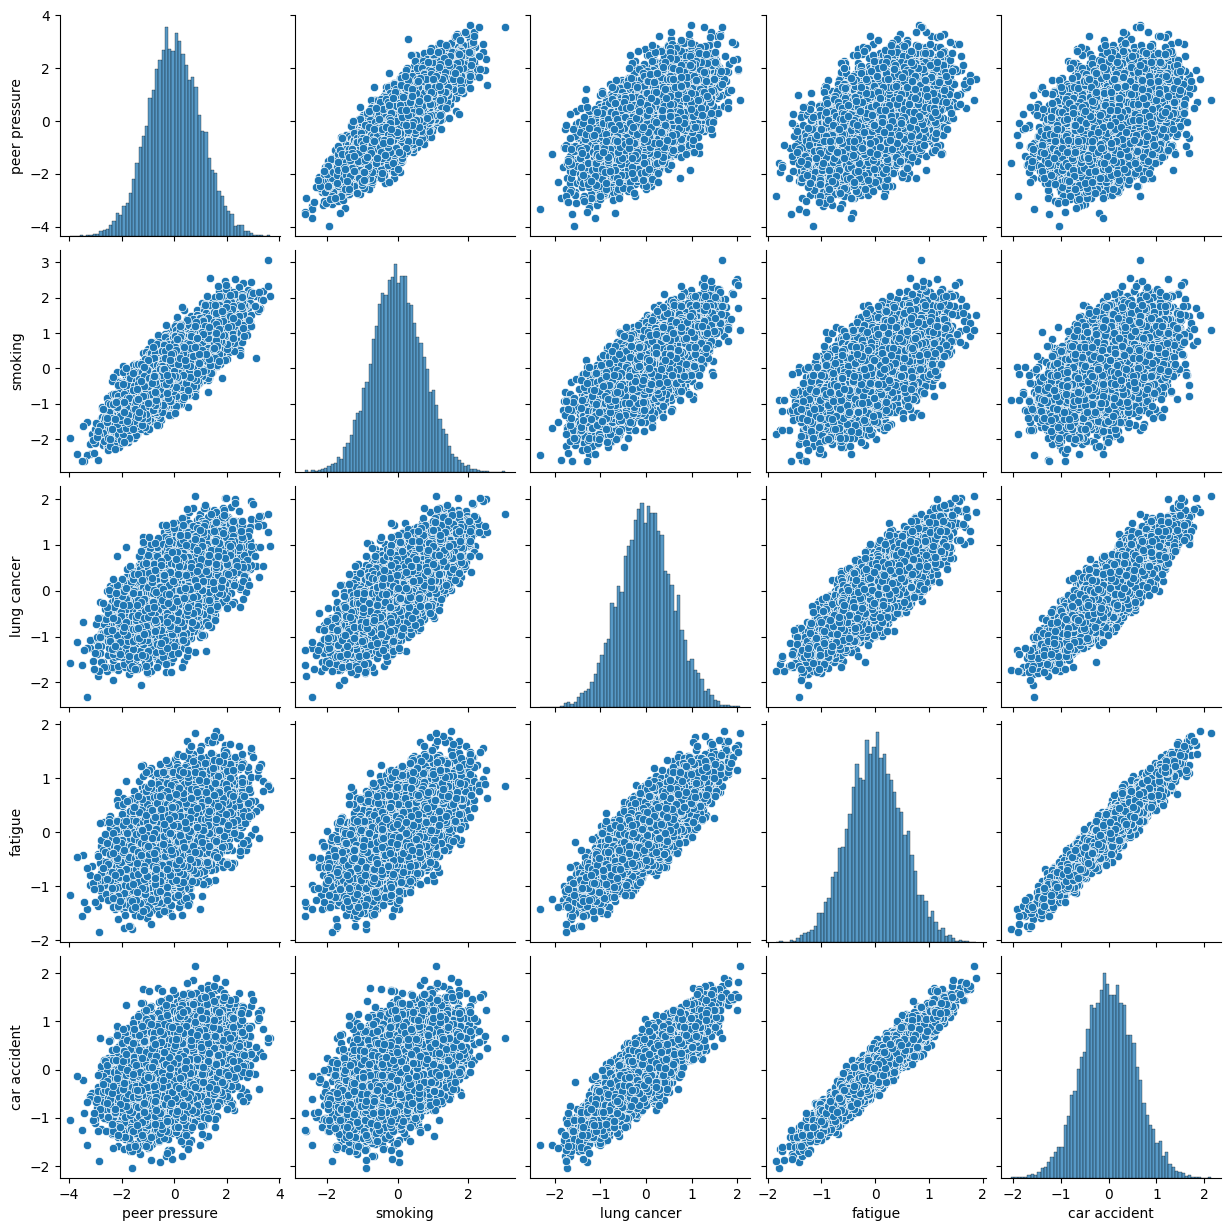

In [12]:
seaborn.pairplot(df, vars=["peer pressure", "smoking", "lung cancer", "fatigue", "car accident"])